In [1]:
from ImpactAtmosphere import EvolveAtm as ev
import numpy as np
from matplotlib import pyplot as plt

In [2]:
print(ev.HCN_transport.__doc__)

Calculates the HCN mixing ratio as a function of altitude for a
    given HCN production rate (PhiHCN). Assumes HCN hydrolyses in an
    ocean at the lower boundary, and rainout from the atmosphere following
    Giorgi and Chameides (1985).

    Parameters
    ----------
    PhiHCN: float
        The HCN production rate (molecules/cm^2/s)
    Ts: float, optional
        The surface temperature (K)
    Ps: float, optional
        The surface pressure (bar)
    mubar: float, optional
        The mean molar weight of the atmosphere (g/mol)
    pH: float, optional
        The pH of the ocean (cm/s)
    Kzz: float, optional
        The eddy diffusion coefficient (cm^2/s)
    top_atm: float, optional
        The top of the atmosphere (cm)
    nz: integer, optional
        The number of vertical descritization in the atmosphere.
    T_trop: float, optional
        Tropospheric temperature (K)
    P_trop: float, optional
        Tropospheric pressure (bar)
    L: float, optional
        g H2O 

In [3]:
PhiHCN = 1.0e9 # HCN production rate in upper atmosphere (molecules/cm2/s)
Ts = 298.0 # Surface temperature (K)
Ps = 1.0e0 # Surface pressure (bar)
mubar = 28.0e0 # mean molecular weight of atmosphere (g/mol)
pH_ocean = 7 # Ocean pH
Kzz = 1.0e5 # Eddy diffusion (cm2/s)
L = 1. # g H2O / m3 of cloud
F = 0.05 # fractin of the time it rains
gamma = 4.0e5 # average time between rain storms (s)

alt, W_HCN, fHCN = ev.HCN_transport(PhiHCN, Ts=Ts, Ps=Ps, mubar=mubar,\
                                    pH=pH_ocean, Kzz=Kzz, L=L, F=F, \
                                    gamma=gamma)

Phi_HCN_rainout = np.sum(W_HCN*(alt[1]-alt[0]))

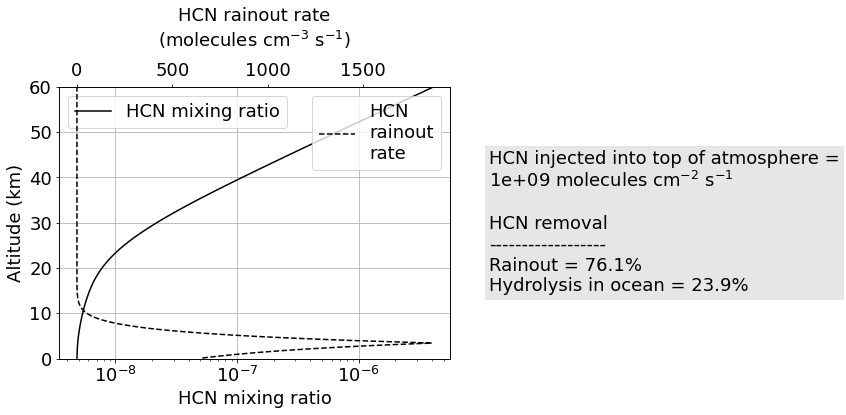

In [4]:
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,1,figsize=[7,5])

ax.plot(fHCN,alt/1e5,'k-',label='HCN mixing ratio')
ax.legend()
ax.set_xscale('log')
ax.set_ylim(0,60)
ax.set_ylabel('Altitude (km)')
ax.set_xlabel('HCN mixing ratio')
ax.grid()

title = 'HCN injected into top of atmosphere =\n'+'%.0e'%PhiHCN+' molecules cm$^{-2}$ s$^{-1}$'+\
        '\n\nHCN removal'+\
        '\n------------------\n'+\
        'Rainout = '+'%.1f'%(100*Phi_HCN_rainout/PhiHCN)+'%'+\
        '\nHydrolysis in ocean = '+'%.1f'%(100*(1-Phi_HCN_rainout/PhiHCN))+'%'
ax.text(1.1, .5, title, transform=ax.transAxes,backgroundcolor='.9',va='center')

ax1 = ax.twiny()
ax1.plot(W_HCN,alt/1e5,'k--',label='HCN\nrainout\nrate')
ax1.set_xlabel('HCN rainout rate\n(molecules cm$^{-3}$ s$^{-1}$)',labelpad=15)
ax1.legend()


plt.show()